In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [4]:
df = pd.read_csv("/content/spam.csv", delimiter=',', encoding='latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.info

<bound method DataFrame.info of         v1  ... Unnamed: 4
0      ham  ...        NaN
1      ham  ...        NaN
2     spam  ...        NaN
3      ham  ...        NaN
4      ham  ...        NaN
...    ...  ...        ...
5567  spam  ...        NaN
5568   ham  ...        NaN
5569   ham  ...        NaN
5570   ham  ...        NaN
5571   ham  ...        NaN

[5572 rows x 5 columns]>

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0, 0.5, 'No of ham and spam messages')

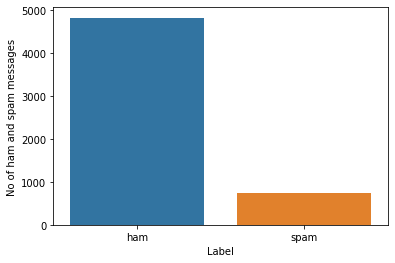

In [11]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.ylabel('No of ham and spam messages')

In [12]:
x = df.v2
y = df.v1
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [14]:
max_words=1000
max_len=150
token=Tokenizer(num_words=max_words)
token.fit_on_texts(x_train)
sequences = token.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [15]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [16]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [17]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 6s 192ms/step - loss: 0.3039 - accuracy: 0.8823 - val_loss: 0.1390 - val_accuracy: 0.9662
Epoch 2/10
30/30 [==============================] - 5s 170ms/step - loss: 0.0692 - accuracy: 0.9839 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 3/10
30/30 [==============================] - 5s 172ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0750 - val_accuracy: 0.9810


In [18]:
test_sequences = token.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [19]:
accr = model.evaluate(test_sequences_matrix,y_test)

27/27 [==============================] - 0s 17ms/step - loss: 0.0857 - accuracy: 0.9761


In [20]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.086
  Accuracy: 0.976
